In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def column_stats(df, column_name, n=None): #function to show how often value shows in column
    if n is None:
        n = df.shape[0] #n = rows. df.shape[0] = rows. 
    count_column_name = column_name + "_count" #making labels for columns. (host_count, virus_count...)
    count_df = pd.DataFrame(df[column_name].value_counts()).reset_index() #makes dataframe and counts how many times 
    #value appears in column. Resets index to display as normal table
    
    count_df.columns=[column_name, count_column_name] #using variable above that made the column labels and
    #assining them to the dataframe's columns. the first column holds unique name values, second column
    #represents the count of them
    
    count_df[column_name + "_percent"] = count_df[count_column_name].apply(lambda x: int(x)/n*100)
    #showing percent of columns a specific value takes up
    print(f"Number of unique values = {len(df[column_name].unique())}")
    #prints the amount of unique values
    print(f"{count_df}")
    return count_df #returns the data frame

#Filters dataframe to show rows only if the value has a column as well
def filter_with_threshold_percentage(df, column_name, threshold, n=None):
    print(f"Size of df = {df.shape}") #size of the data frame. amount of rows and columns before we filter
    if n is None:
        n = df.shape[0] #makes n the number of rows
    print(f"n= {n}") #prints amount of rows
    count_df = column_stats(df, column_name, n=n) #calling in previous function, passing in data frame, the column name, and #rows
    #Gets amt of times (count) value appears in the data frame column
    
    percent_column_name = column_name + "_percent" #making variable
    
    filtered_count_df = count_df[count_df[percent_column_name] >= threshold]
    #keep the values that are greater than threshold percent. get count of them
    
    filtered_df = df[df[column_name].isin(list(filtered_count_df[column_name].values))]
    #checks list of filtered columns. only keeps rows where the value in the row's column has been filtered
    #converts array of allowed filtered values into a list and checks every row (df[column_name].isin...) 
    #to see if its value is in the list
    #calling df[] on the entire thing represents it in boolean values. true if row is eligible, false if not.
    #keeps only true rows. 
    
    print(f"Size of filtered df = {filtered_df.shape}") #how many columns are in the dataframeafter filtered
    column_stats(filtered_df, column_name, n=n) #calls column_stats method from before
    #gets amount of times (count) value appears in the filtered dataframe columns
    return filtered_df #returns filtered dataframe

In [3]:
#Filters dataframe to include rows where value appears at least 'threshold' amount of times
def filter_with_threshold_count(df, column_name, threshold, n=None):
    print(f"Size of df = {df.shape}") #prints original size of dataframe before modifying
    n = df.shape[0] # n is equal to the amount of columns
    count_df = column_stats(df, column_name, n=n) #count & percentage for each unique value
    count_column_name = column_name + "_count" #name of count column
    filtered_count_df = count_df[count_df[count_column_name] >= threshold] #keeys rows with values that show
    #at least threshold times
    filtered_df = df[df[column_name].isin(list(filtered_count_df[column_name].values))]
    #creates filtered dataframe that contains rows which only have filtered column values
    print(f"Size of filtered df = {filtered_df.shape}") #prints filtered dataframe size
    column_stats(filtered_df, column_name, n=n) #stats for the filtered dataframe
    return filtered_df

In [4]:
def print_seq_len_histogram(df, n_bins):
    sns.histplot(df["seq_len"]) #creats histogram plot of sequence lengths
    #displays the min and max lengths
    print(f"min seq len = {min(df['seq_len'])}")
    print(f"max seq len = {max(df['seq_len'])}")
    plt.show()
    
    freq, bins = np.histogram(df["seq_len"], bins=n_bins)
    #frequency of bins displayed using numpy.
    #the diff sequences are split into even bins 
    n = df.shape[0] #represents rows
    hist_map = [] #creating list to store the histogram data
    for i in range(n_bins): #going thru bins
        hist_map.append({"start": bins[i], "end":bins[i+1], "count": freq[i], "percentage": freq[i]/n*100})
        #creating the table, starting and ending values for each bin, also shows count and percentage of the value
        #the bins hold sequence lengths
    hist_df = pd.DataFrame(hist_map) #dataframe of histogram created
    print(hist_df) #histogram dataframe printed.

# UniRef50 - EMBL mapping Dataset Generation: Sanjana Edited


### /home/sanjanag05/HAVEN/output/uniref_taxonomy_id_10239_AND_identit_2025_04_18_uniprot_metadata_embl_hosts_pruned_metadata.csv

In [5]:
file_path = os.path.join(os.getcwd(), "..", "..", "..","..", "/home/sanjanag05/HAVEN/output/uniref_taxonomy_id_10239_AND_identit_2025_04_18_uniprot_metadata_embl_hosts_pruned_metadata.csv")
df = pd.read_csv(file_path)
df
#prints out a table (data frame) of hosts, shows their host name, virus name, taxon rank, etc.

,uniref50_id,tax_id,uniprot_host_tax_ids,embl_ref_id,embl_host_name,virus_host_name,virus_name,virus_taxon_rank,virus_host_tax_id,virus_host_taxon_rank
0,UniRef50_A0A023I618,11676,[9606],AGT79503.1,['Homo sapiens'],homo sapiens,Human immunodeficiency virus 1,no rank,9606,species
1,UniRef50_A0A3T0IET8,2500150,NaN,AZU97937.1,['Vibrio maritimus'],vibrio maritimus,Vibrio phage LP.1,species,990268,species
2,UniRef50_A0AAF0D8M8,3035942,NaN,WEV89353.1,['Aeromonas hydrophila AH10 (CCTCC AB2014155)'],aeromonas hydrophila ah10 (cctcc ab2014155),Aeromonas phage HJ05,species,0,NaN
3,UniRef50_A0A023I620,11676,[9606],AGT79508.1,['Homo sapiens'],homo sapiens,Human immunodeficiency virus 1,no rank,9606,species
4,UniRef50_A0A3T0IEU2,2788787,NaN,AZU97875.1,['Vibrio maritimus'],vibrio maritimus,unclassified Caudoviricetes,no rank,990268,species
...,...,...,...,...,...,...,...,...,...,...
253066,UniRef50_X5M4V3,764030,NaN,CDO33888.1,['pigeon'],pigeon,Pigeon adenovirus 1,no rank,0,NaN
253067,UniRef50_X5M4W7,764030,NaN,CDO33908.1,['pigeon'],pigeon,Pigeon adenovirus 1,no rank,0,NaN
253068,UniRef50_X5M4X2,764030,NaN,CDO33913.1,['pigeon'],pigeon,Pigeon adenovirus 1,no rank,0,NaN
253069,UniRef50_X5M4X4,764030,NaN,CDO33918.1,['pigeon'],pigeon,Pigeon adenovirus 1,no rank,0,NaN


In [6]:
column_stats(df[df["virus_taxon_rank"] == "species"], "virus_name")

Number of unique values = 12764
                                   virus_name  virus_name_count  \
0                 Prokaryotic dsDNA virus sp.             13748   
1                           Hepatitis B virus              1139   
2                     Pandoravirus inopinatum              1089   
3                   White spot syndrome virus              1007   
4                               Kaumoebavirus               746   
...                                       ...               ...   
12759  Streptococcus satellite phage Javan571                 1   
12760  Streptococcus satellite phage Javan560                 1   
12761             Pseudomonas phage BUCT-PX-5                 1   
12762                   Bovine picobirnavirus                 1   
12763     Nilaparvata lugens honeydew virus-3                 1   

       virus_name_percent  
0               11.790434  
1                0.976819  
2                0.933938  
3                0.863614  
4                0.6397

,virus_name,virus_name_count,virus_name_percent
0,Prokaryotic dsDNA virus sp.,13748,11.790434
1,Hepatitis B virus,1139,0.976819
2,Pandoravirus inopinatum,1089,0.933938
3,White spot syndrome virus,1007,0.863614
4,Kaumoebavirus,746,0.639778
...,...,...,...
12759,Streptococcus satellite phage Javan571,1,0.000858
12760,Streptococcus satellite phage Javan560,1,0.000858
12761,Pseudomonas phage BUCT-PX-5,1,0.000858
12762,Bovine picobirnavirus,1,0.000858


In [7]:
column_stats(df[df["virus_taxon_rank"] == "species"], "virus_host_name")

Number of unique values = 5304
                       virus_host_name  virus_host_name_count  \
0                             bacteria                  13712   
1                         homo sapiens                   4109   
2                     acanthamoeba sp.                   2000   
3                     escherichia coli                   1526   
4               pseudomonas aeruginosa                   1473   
...                                ...                    ...   
5299               convallaria keiskei                      1   
5300  porphyromonas gingivalis kyuda-4                      1   
5301                  paeonia ludlowii                      1   
5302               cinnamomum camphora                      1   
5303                     paradise fish                      1   

      virus_host_name_percent  
0                   11.759560  
1                    3.523923  
2                    1.715222  
3                    1.308714  
4                    1.26326

,virus_host_name,virus_host_name_count,virus_host_name_percent
0,bacteria,13712,11.759560
1,homo sapiens,4109,3.523923
2,acanthamoeba sp.,2000,1.715222
3,escherichia coli,1526,1.308714
4,pseudomonas aeruginosa,1473,1.263261
...,...,...,...
5299,convallaria keiskei,1,0.000858
5300,porphyromonas gingivalis kyuda-4,1,0.000858
5301,paeonia ludlowii,1,0.000858
5302,cinnamomum camphora,1,0.000858


### uniref90_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq.csv
### /home/sanjanag05/HAVEN/output/uniref_taxonomy_id_10239_AND_identit_2025_04_18_uniprot_metadata_embl_hosts_pruned_metadata_species_virus_species_virus_host_vertebrates_w_seq.csv
sanjana edited


In [8]:
file_path = os.path.join(os.getcwd(), "..", "..", "..","..", "/home/sanjanag05/HAVEN/output/uniref_taxonomy_id_10239_AND_identit_2025_04_18_uniprot_metadata_embl_hosts_pruned_metadata_species_virus_species_virus_host_vertebrates_w_seq.csv")

In [9]:
df = pd.read_csv(file_path)
df["seq_len"] = df["seq"].apply(lambda x: len(x))

### Deduplicate: Remove duplicates, retain the first occurence
#### TODO: Investigate the presence of 5 duplicate records

In [10]:
df = df[~df.duplicated()]

In [11]:
print("df size = ", df.shape)
df.head()

df size =  (15851, 12)


,uniref50_id,tax_id,uniprot_host_tax_ids,embl_ref_id,embl_host_name,virus_host_name,virus_name,virus_taxon_rank,virus_host_tax_id,virus_host_taxon_rank,seq,seq_len
0,UniRef50_A0A023JMK3,169066,NaN,AHL26139.1,['Homo sapiens'],homo sapiens,Human rhinovirus sp.,species,9606,species,QCMFVPPGAPIPKKRDDYTWQSGTNASVFWQQGQTYPRFSIPFSSI...,187
1,UniRef50_A0A023NLN1,3052707,NaN,AHX03037.1,['dog'],canis lupus,Protoparvovirus carnivoran1,species,9612,species,GAVQPDGGQPAVRNERATGSGNGSGGGGGGGSGGVGISTGTFNNQT...,262
2,UniRef50_A0A023SDL2,28875,NaN,AHX71698.1,['pig'],pig,Rotavirus A,species,9823,species,EVIKENSYVYVDYWDDSKAFRNMVYVRSLAANLNSVKCTGGSYNFS...,168
3,UniRef50_A0A023SG76,10407,"[9606, 9598]",AHX73937.1,['Homo sapiens'],homo sapiens,Hepatitis B virus,species,9606,species,HLVNLLEDWGPCTEHGEHHIRIPRTPARVTGGVFLVDKNPHNTAES...,175
4,UniRef50_A0A023T4I6,10407,"[9606, 9598]",AHX82176.1,['Homo sapiens'],homo sapiens,Hepatitis B virus,species,9606,species,MDDVVLGAKSVQHLESLFTSITNFLLSLGIHLNPNKTKRWGYSLHF...,148


In [12]:
column_stats(df, "virus_name").to_csv(os.path.join(os.getcwd(), "..", "..", "..","..", "/home/sanjanag05/HAVEN/output/uniref_taxonomy_id_10239_AND_identit_2025_04_18_uniprot_metadata_embl_hosts_pruned_metadata_species_virus.csv"))
#this table shows the names and the counts of the viruses from the virus csv file. It also shows the percent a specific virus shows up. Hepatitis is most common.

Number of unique values = 2748
                        virus_name  virus_name_count  virus_name_percent
0                Hepatitis B virus              1129            7.122579
1     Human immunodeficiency virus               554            3.495048
2            Marmot picobirnavirus               398            2.510883
3                 Carp edema virus               385            2.428869
4        African swine fever virus               381            2.403634
...                            ...               ...                 ...
2743                Tarbeyev virus                 1            0.006309
2744                  Stroud virus                 1            0.006309
2745            de Kerguelen virus                 1            0.006309
2746                   Raina virus                 1            0.006309
2747       Peromfec virus RodF5_43                 1            0.006309

[2748 rows x 3 columns]


In [13]:
column_stats(df, "virus_host_name").to_csv(os.path.join(os.getcwd(), "..", "..", "..","..", "/home/sanjanag05/HAVEN/output/uniref_taxonomy_id_10239_AND_identit_2025_04_18_uniprot_metadata_embl_hosts_pruned_metadata_species_virus_species_virus_host.csv"))
#this table shows the names and counts of hosts. It also shows percent a specific host shows up. Homo sapiens is most common.

Number of unique values = 939
               virus_host_name  virus_host_name_count  virus_host_name_percent
0                 homo sapiens                   4109                25.922655
1                   sus scrofa                    729                 4.599079
2    hydrochoerus hydrochaeris                    605                 3.816794
3        propithecus coquereli                    421                 2.655984
4           marmota himalayana                    401                 2.529809
..                         ...                    ...                      ...
934                 anas acuta                      1                 0.006309
935       hylomyscus endorobae                      1                 0.006309
936          diphylla ecaudata                      1                 0.006309
937           blue-winged teal                      1                 0.006309
938              paradise fish                      1                 0.006309

[939 rows x 3 columns

min seq len = 11
max seq len = 7154


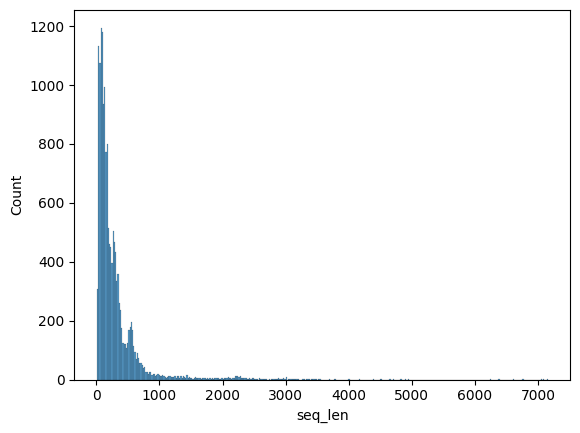

      start      end  count  percentage
0     11.00   606.25  14404   90.871238
1    606.25  1201.50    918    5.791433
2   1201.50  1796.75    210    1.324838
3   1796.75  2392.00    178    1.122958
4   2392.00  2987.25     73    0.460539
5   2987.25  3582.50     46    0.290203
6   3582.50  4177.75      7    0.044161
7   4177.75  4773.00      5    0.031544
8   4773.00  5368.25      3    0.018926
9   5368.25  5963.50      0    0.000000
10  5963.50  6558.75      2    0.012618
11  6558.75  7154.00      5    0.031544


In [14]:
print_seq_len_histogram(df, 12)

## Non - Immunodeficiency Virus

In [15]:
virus_names = list(df["virus_name"].unique())
print(f"Number of unique viruses = {len(virus_names)}")
virus_names

Number of unique viruses = 2748


['Human rhinovirus sp.',
 'Protoparvovirus carnivoran1',
 'Rotavirus A',
 'Hepatitis B virus',
 'Nodaviridae sp.',
 'Red fox fecal amdovirus',
 'Fox fecal rhabdovirus',
 'Otter fecal bunyavirus',
 'Fox fecal bunyavirus',
 'Elephant endotheliotropic herpesvirus 6',
 'Elephant endotheliotropic herpesvirus 2',
 'Orthobornavirus alphapsittaciforme',
 'Human papillomavirus',
 'Eptesicus serotinus papillomavirus',
 'Human immunodeficiency virus',
 'Enterovirus B',
 'SEN virus',
 'Tadarida brasiliensis papillomavirus',
 'Penguinpox virus',
 'Po-Circo-like virus',
 'Circo-like virus Croatia 17_S17',
 'Orf virus',
 'Grus nigricollis-associatied genomovirus',
 'Chikungunya virus',
 'Camp Ripley virus',
 'Hepacivirus hominis',
 'Chicken circovirus SDWF',
 'Mammarenavirus lassaense',
 'Bovine papillomavirus',
 'Tree shrew papillomavirus 1',
 'Redspotted grouper nervous necrosis virus',
 'Calicivirus BtCalV/EP38/HUN/2013',
 'Hantavirus sp.',
 'Pangolin coronavirus GZ5-2',
 'Astrovirus sp.',
 'Middl

In [16]:
idv_names = list(filter(lambda x: "immunodeficiency" in x.lower(), virus_names)) #filtering to get only immunodefiicent

In [17]:
print(idv_names) #print out immunodeficient
idv_df = df[df["virus_name"].isin(idv_names)] #makes a table of immunodeficiency virus 
print(idv_df.shape) #573 rows, 12 columns
idv_df

['Human immunodeficiency virus', 'Simian-Human immunodeficiency virus']
(573, 12)


,uniref50_id,tax_id,uniprot_host_tax_ids,embl_ref_id,embl_host_name,virus_host_name,virus_name,virus_taxon_rank,virus_host_tax_id,virus_host_taxon_rank,seq,seq_len
32,UniRef50_A0A068CCI6,12721,NaN,AID19671.1,['Homo sapiens'],homo sapiens,Human immunodeficiency virus,species,9606,species,PQITLWQRPLVTIKIGGQXREALLDTGADDTVLEDMNLPGRWKPKM...,390
33,UniRef50_A0A068CD39,12721,NaN,AID19831.1,['Homo sapiens'],homo sapiens,Human immunodeficiency virus,species,9606,species,PQITLWQRPIVTIKXGGQLKEALLDTGADDTVLEXXXLPGXWKPKM...,390
34,UniRef50_A0A068CED6,12721,NaN,AID20176.1,['Homo sapiens'],homo sapiens,Human immunodeficiency virus,species,9606,species,PQITLWQRPLVTVKIGGQLREALLDTGADDTVLEDINLPGRWKPKM...,390
35,UniRef50_A0A068CIM1,12721,NaN,AID19314.1,['Homo sapiens'],homo sapiens,Human immunodeficiency virus,species,9606,species,PQITLWQRPLVXIKIGGQLKEALLDTGADDTVLEEMXLPGXXKPKM...,390
99,UniRef50_A0A068FIA6,12721,NaN,AID65881.1,['Homo sapiens'],homo sapiens,Human immunodeficiency virus,species,9606,species,PQITLWQRPLVTIKVGGQIKEALLDTGADDTVLEEINLPGKWKPKM...,430
...,...,...,...,...,...,...,...,...,...,...,...,...
13042,UniRef50_R4S3J4,12721,NaN,AGL95731.1,['Homo sapiens'],homo sapiens,Human immunodeficiency virus,species,9606,species,AVGLGAVFLGFLGTAGSTMGAASITLTVQVRQLLSGIVQQQSNLLR...,178
15272,UniRef50_A0A346II59,12721,NaN,AXP17214.1,['Homo sapiens; sex: male'],homo sapiens,Human immunodeficiency virus,species,9606,species,FKFAGRWPVKTIHTDNGSNFTSTTVKAACWWAGVKQEFGIPYNPQS...,74
15273,UniRef50_A0A346II60,12721,NaN,AXP17215.1,['Homo sapiens; sex: male'],homo sapiens,Human immunodeficiency virus,species,9606,species,KLAGRWPVKTIHTDNGSNFTSTTVKAACWWAGIKQEFGIPYNPQSQ...,72
15275,UniRef50_A0A346II69,12721,NaN,AXP17224.1,['Homo sapiens; sex: male'],homo sapiens,Human immunodeficiency virus,species,9606,species,EELRSLFNTIAVLYCVHQNIEIKDTKEALDKIEEEQNKSKKKTQPA...,82


In [18]:
non_idv_df = df[~df["virus_name"].isin(idv_names)] #filtering OUT virus_name. 
non_idv_df.shape #since we filtered out immunodeficient, our df is now only the nonimmunodeficient

(15278, 12)

In [19]:
output_file_path = os.path.join(os.getcwd(), "..", "..", "..","..", "/home/sanjanag05/HAVEN/output/uniref50_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq_non_idv.csv")
non_idv_df.to_csv(output_file_path, index=False) #only keep for first time. 
#we get our nonimmunodeficient data and make it into a file

In [20]:
#non_idv_df = pd.read_csv(output_file_path) reading it
non_idv_df.shape

(15278, 12)

In [21]:
column_stats(non_idv_df, "virus_name").to_csv(os.path.join(os.getcwd(), "..", "..", "..","..", "/home/sanjanag05/HAVEN/output/uniref50_viridae_embl_hosts_pruned_species_vertebrates_nonidv_virus.csv"))
#makes a csv file of the unique virus values into a csv file that goes into my arc

Number of unique values = 2746
                     virus_name  virus_name_count  virus_name_percent
0             Hepatitis B virus              1129            7.389711
1         Marmot picobirnavirus               398            2.605053
2              Carp edema virus               385            2.519963
3     African swine fever virus               381            2.493782
4             Bacteriophage sp.               359            2.349784
...                         ...               ...                 ...
2741                Oates virus                 1            0.006545
2742          de Castilla virus                 1            0.006545
2743             la Roche virus                 1            0.006545
2744               Coelho virus                 1            0.006545
2745            d'Urville virus                 1            0.006545

[2746 rows x 3 columns]


In [22]:
column_stats(non_idv_df, "virus_host_name").to_csv(os.path.join(os.getcwd(), "..", "..", "..","..", "/home/sanjanag05/HAVEN/output/uniref50_viridae_embl_hosts_pruned_species_vertebrates_nonidv_virus_host.csv"))
#prints out the host of the virus and saves it into a csv file to my arc. humans are the most common 

Number of unique values = 937
               virus_host_name  virus_host_name_count  virus_host_name_percent
0                 homo sapiens                   3551                23.242571
1                   sus scrofa                    729                 4.771567
2    hydrochoerus hydrochaeris                    605                 3.959942
3        propithecus coquereli                    421                 2.755596
4           marmota himalayana                    401                 2.624689
..                         ...                    ...                      ...
932                 anas acuta                      1                 0.006545
933       hylomyscus endorobae                      1                 0.006545
934          diphylla ecaudata                      1                 0.006545
935           blue-winged teal                      1                 0.006545
936              paradise fish                      1                 0.006545

[937 rows x 3 columns

min seq len = 11
max seq len = 7154


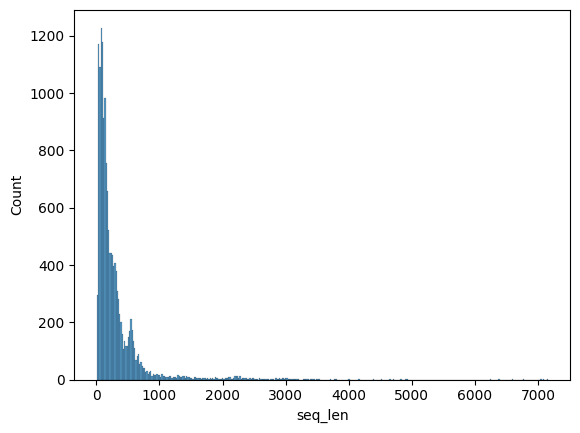

      start      end  count  percentage
0     11.00   606.25  13833   90.541956
1    606.25  1201.50    916    5.995549
2   1201.50  1796.75    210    1.374525
3   1796.75  2392.00    178    1.165074
4   2392.00  2987.25     73    0.477811
5   2987.25  3582.50     46    0.301087
6   3582.50  4177.75      7    0.045818
7   4177.75  4773.00      5    0.032727
8   4773.00  5368.25      3    0.019636
9   5368.25  5963.50      0    0.000000
10  5963.50  6558.75      2    0.013091
11  6558.75  7154.00      5    0.032727


In [23]:
print_seq_len_histogram(non_idv_df, 12)
#prints length of non idv data into a histogram?? confused

**Number of host classes**

In [24]:
# 1% cutoff (scroll down)
filtered_df = filter_with_threshold_percentage(non_idv_df, "virus_host_name", 1)
#filters so that all virus_host_name must appear for at least 1% of the data. #unique values og = 937, went down to 15 after filtering!

Size of df = (15278, 12)
n= 15278
Number of unique values = 937
               virus_host_name  virus_host_name_count  virus_host_name_percent
0                 homo sapiens                   3551                23.242571
1                   sus scrofa                    729                 4.771567
2    hydrochoerus hydrochaeris                    605                 3.959942
3        propithecus coquereli                    421                 2.755596
4           marmota himalayana                    401                 2.624689
..                         ...                    ...                      ...
932                 anas acuta                      1                 0.006545
933       hylomyscus endorobae                      1                 0.006545
934          diphylla ecaudata                      1                 0.006545
935           blue-winged teal                      1                 0.006545
936              paradise fish                      1              

In [25]:
filtered_two = filter_with_threshold_percentage(non_idv_df, "virus_host_name", 2)

output_file_path = os.path.join(os.getcwd(), "..", "..", "..","..", "/home/sanjanag05/HAVEN/output/uniref50_viridae_embl_twopercent.csv")
filtered_two.to_csv(output_file_path, index=False) #only keep for first time. 

Size of df = (15278, 12)
n= 15278
Number of unique values = 937
               virus_host_name  virus_host_name_count  virus_host_name_percent
0                 homo sapiens                   3551                23.242571
1                   sus scrofa                    729                 4.771567
2    hydrochoerus hydrochaeris                    605                 3.959942
3        propithecus coquereli                    421                 2.755596
4           marmota himalayana                    401                 2.624689
..                         ...                    ...                      ...
932                 anas acuta                      1                 0.006545
933       hylomyscus endorobae                      1                 0.006545
934          diphylla ecaudata                      1                 0.006545
935           blue-winged teal                      1                 0.006545
936              paradise fish                      1              

In [26]:
filtered_two
#2% prevalence has 6469 rows

,uniref50_id,tax_id,uniprot_host_tax_ids,embl_ref_id,embl_host_name,virus_host_name,virus_name,virus_taxon_rank,virus_host_tax_id,virus_host_taxon_rank,seq,seq_len
0,UniRef50_A0A023JMK3,169066,NaN,AHL26139.1,['Homo sapiens'],homo sapiens,Human rhinovirus sp.,species,9606,species,QCMFVPPGAPIPKKRDDYTWQSGTNASVFWQQGQTYPRFSIPFSSI...,187
3,UniRef50_A0A023SG76,10407,"[9606, 9598]",AHX73937.1,['Homo sapiens'],homo sapiens,Hepatitis B virus,species,9606,species,HLVNLLEDWGPCTEHGEHHIRIPRTPARVTGGVFLVDKNPHNTAES...,175
4,UniRef50_A0A023T4I6,10407,"[9606, 9598]",AHX82176.1,['Homo sapiens'],homo sapiens,Hepatitis B virus,species,9606,species,MDDVVLGAKSVQHLESLFTSITNFLLSLGIHLNPNKTKRWGYSLHF...,148
5,UniRef50_A0A023UHS9,28875,NaN,AHY02356.1,['Homo sapiens'],homo sapiens,Rotavirus A,species,9606,species,ITLYYYQQTDEANKWISMGSSCTVKVCPLNTQTLGIGCLTTDPSTF...,117
6,UniRef50_A0A023UJ63,28875,NaN,AHY02390.1,['Homo sapiens'],homo sapiens,Rotavirus A,species,9606,species,QAFRKGIIMGLDILANMTNDAKVIQTLNLYKQTQINLMDSYVQIPD...,96
...,...,...,...,...,...,...,...,...,...,...,...,...
15976,UniRef50_W6A915,1335626,NaN,AHI48725.1,['Homo sapiens'],homo sapiens,Middle East respiratory syndrome-related coron...,species,9606,species,MIHSVFLLMFLLTPTESYVDVGPDSVKSACIEVDIQQTFFDKTWPR...,613
15977,UniRef50_W6A935,1335626,NaN,AHI48745.1,['Homo sapiens'],homo sapiens,Middle East respiratory syndrome-related coron...,species,9606,species,KALQTYSETGSDLLYQPPNCSITSGVLQSGLVKMSHPSGDVEACMV...,1172
15978,UniRef50_W6A938,1335626,NaN,AHI48750.1,['Homo sapiens'],homo sapiens,Middle East respiratory syndrome-related coron...,species,9606,species,LKALQKAVNIAKNAYEKDKAVARKLERMADQAMTSMYKQARAEDKX...,880
15979,UniRef50_W6A976,1335626,NaN,AHI48785.1,['Homo sapiens'],homo sapiens,Middle East respiratory syndrome-related coron...,species,9606,species,YFTLGCKILTLTPRNKWSGVSDLSLKQKLLYTFYGKESLENPTYIY...,315


min seq len = 11
max seq len = 7078


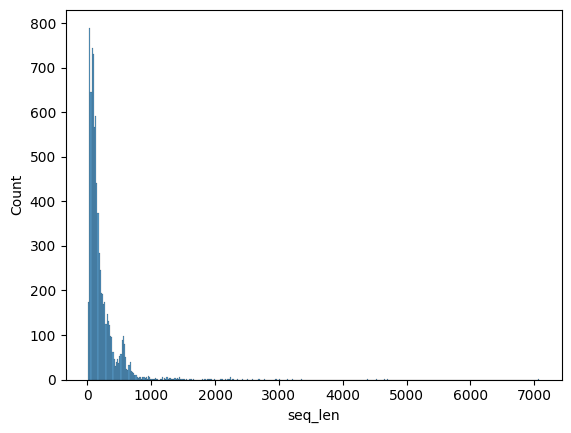

          start          end  count  percentage
0     11.000000   599.916667   7701   95.344806
1    599.916667  1188.833333    283    3.503776
2   1188.833333  1777.750000     47    0.581899
3   1777.750000  2366.666667     28    0.346663
4   2366.666667  2955.583333      8    0.099047
5   2955.583333  3544.500000      5    0.061904
6   3544.500000  4133.416667      0    0.000000
7   4133.416667  4722.333333      4    0.049523
8   4722.333333  5311.250000      0    0.000000
9   5311.250000  5900.166667      0    0.000000
10  5900.166667  6489.083333      0    0.000000
11  6489.083333  7078.000000      1    0.012381


In [27]:
print_seq_len_histogram(filtered_df, 12)
#plots histogram to show how sequence lengths are distributed
#prints min and max sequence lengths. creates 12 bins and shows what % of total count 
#and the count of sequences available.

#seq_len = sequence length. like #amino acids. EX:MVLTIYPDELVQIVSDKK IS LENGTH OF 18
#THERE ARE TWELVE BINS. start represents min value of sequence legnth and end rep max value of seq_len in that bin
#shows percentage of these seq_len ranges in the dataset

In [28]:
output_file_path = os.path.join(os.getcwd(), "..", "..", "..","..", "/home/sanjanag05/HAVEN/output/uniref50_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq_non_idv_t0.01_c5.csv")
filtered_df.to_csv(output_file_path, index=False)
#saves these values into a csv file
#i uncommented this and saved it to my arc, not sure if i was supposed to do so

**Sequence Length Parameters**

In [29]:
np.percentile(filtered_df["seq_len"].values, [90, 95, 99.9]) 
#calculates percentile values of 90,95,99.9
#90%,95%,99.9% sequences that are shorter than or equal to the sequence length
#90% are 483 amino acids long, 95% are 588 long, and 99.9% are 3003.884 long
#this allows us to delete outliers and helps us understand range of lengths
#can set max sequence length

array([ 483.   ,  588.   , 3003.884])

min seq len = 11
max seq len = 7078


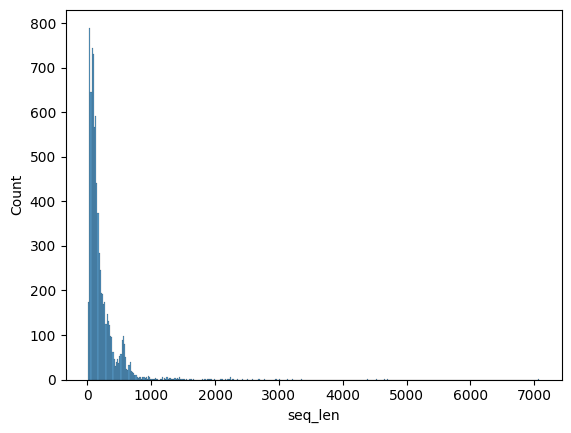

          start          end  count  percentage
0     11.000000   599.916667   7701   95.344806
1    599.916667  1188.833333    283    3.503776
2   1188.833333  1777.750000     47    0.581899
3   1777.750000  2366.666667     28    0.346663
4   2366.666667  2955.583333      8    0.099047
5   2955.583333  3544.500000      5    0.061904
6   3544.500000  4133.416667      0    0.000000
7   4133.416667  4722.333333      4    0.049523
8   4722.333333  5311.250000      0    0.000000
9   5311.250000  5900.166667      0    0.000000
10  5900.166667  6489.083333      0    0.000000
11  6489.083333  7078.000000      1    0.012381


(8077, 12)

In [30]:
print_seq_len_histogram(filtered_df, 12)
filtered_df.shape

min seq len = 11
max seq len = 3007


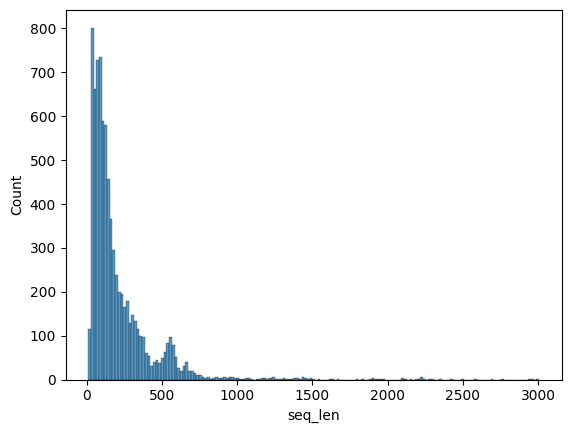

          start          end  count  percentage
0     11.000000   260.666667   6107   75.684719
1    260.666667   510.333333   1227   15.206345
2    510.333333   760.000000    570    7.064072
3    760.000000  1009.666667     60    0.743587
4   1009.666667  1259.333333     31    0.384186
5   1259.333333  1509.000000     31    0.384186
6   1509.000000  1758.666667      5    0.061966
7   1758.666667  2008.333333     11    0.136324
8   2008.333333  2258.000000     14    0.173504
9   2258.000000  2507.666667      5    0.061966
10  2507.666667  2757.333333      3    0.037179
11  2757.333333  3007.000000      5    0.061966


In [31]:
seq_len_filtered_df = filtered_df[filtered_df["seq_len"] <= 3036]
seq_len_filtered_df.shape
print_seq_len_histogram(seq_len_filtered_df,12)
#filters out those with sequence letters greater than 3036
#shape goes down by about 8 rows

In [32]:
column_stats(seq_len_filtered_df, "virus_host_name")

Number of unique values = 15
              virus_host_name  virus_host_name_count  virus_host_name_percent
0                homo sapiens                   3549                43.983145
1                  sus scrofa                    725                 8.985004
2   hydrochoerus hydrochaeris                    605                 7.497831
3       propithecus coquereli                    421                 5.217499
4          marmota himalayana                    401                 4.969637
5             cyprinus carpio                    398                 4.932458
6           varecia variegata                    364                 4.511092
7               gallus gallus                    285                 3.532036
8              eulemur fulvus                    227                 2.813236
9           peromyscus boylii                    210                 2.602553
10          gopherus morafkai                    205                 2.540587
11       theropithecus gelada      

,virus_host_name,virus_host_name_count,virus_host_name_percent
0,homo sapiens,3549,43.983145
1,sus scrofa,725,8.985004
2,hydrochoerus hydrochaeris,605,7.497831
3,propithecus coquereli,421,5.217499
4,marmota himalayana,401,4.969637
5,cyprinus carpio,398,4.932458
6,varecia variegata,364,4.511092
7,gallus gallus,285,3.532036
8,eulemur fulvus,227,2.813236
9,peromyscus boylii,210,2.602553


In [33]:
column_stats(seq_len_filtered_df, "virus_name") #shows the virus host name, count, and percent of the
#new filtered dataframe

Number of unique values = 783
                          virus_name  virus_name_count  virus_name_percent
0                  Hepatitis B virus              1116           13.830710
1              Marmot picobirnavirus               398            4.932458
2                   Carp edema virus               385            4.771347
3                  Bacteriophage sp.               359            4.449126
4                Hepacivirus hominis               333            4.126905
..                               ...               ...                 ...
778  Galliform chaphamaparvovirus 10                 1            0.012393
779  Galliform chaphamaparvovirus 13                 1            0.012393
780                   Pegivirus suis                 1            0.012393
781                     Posavirus 12                 1            0.012393
782                      Cosavirus D                 1            0.012393

[783 rows x 3 columns]


,virus_name,virus_name_count,virus_name_percent
0,Hepatitis B virus,1116,13.830710
1,Marmot picobirnavirus,398,4.932458
2,Carp edema virus,385,4.771347
3,Bacteriophage sp.,359,4.449126
4,Hepacivirus hominis,333,4.126905
...,...,...,...
778,Galliform chaphamaparvovirus 10,1,0.012393
779,Galliform chaphamaparvovirus 13,1,0.012393
780,Pegivirus suis,1,0.012393
781,Posavirus 12,1,0.012393


In [59]:
output_file_path = os.path.join(os.getcwd(), "..", "..", "..","..", "/home/sanjanag05/HAVEN/output/uniref50_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq_non_idv_t0.01_c5_seq_len_in_99.9percentile.csv")
seq_len_filtered_df.to_csv(output_file_path, index=False)
seq_len_filtered_df
#i uncommented this and saved, not sure if i was supposed to

,uniref50_id,tax_id,uniprot_host_tax_ids,embl_ref_id,embl_host_name,virus_host_name,virus_name,virus_taxon_rank,virus_host_tax_id,virus_host_taxon_rank,seq,seq_len
0,UniRef50_A0A023JMK3,169066,NaN,AHL26139.1,['Homo sapiens'],homo sapiens,Human rhinovirus sp.,species,9606,species,QCMFVPPGAPIPKKRDDYTWQSGTNASVFWQQGQTYPRFSIPFSSI...,187
1,UniRef50_A0A023SG76,10407,"[9606, 9598]",AHX73937.1,['Homo sapiens'],homo sapiens,Hepatitis B virus,species,9606,species,HLVNLLEDWGPCTEHGEHHIRIPRTPARVTGGVFLVDKNPHNTAES...,175
2,UniRef50_A0A023T4I6,10407,"[9606, 9598]",AHX82176.1,['Homo sapiens'],homo sapiens,Hepatitis B virus,species,9606,species,MDDVVLGAKSVQHLESLFTSITNFLLSLGIHLNPNKTKRWGYSLHF...,148
3,UniRef50_A0A023UHS9,28875,NaN,AHY02356.1,['Homo sapiens'],homo sapiens,Rotavirus A,species,9606,species,ITLYYYQQTDEANKWISMGSSCTVKVCPLNTQTLGIGCLTTDPSTF...,117
4,UniRef50_A0A023UJ63,28875,NaN,AHY02390.1,['Homo sapiens'],homo sapiens,Rotavirus A,species,9606,species,QAFRKGIIMGLDILANMTNDAKVIQTLNLYKQTQINLMDSYVQIPD...,96
...,...,...,...,...,...,...,...,...,...,...,...,...
8072,UniRef50_W6A935,1335626,NaN,AHI48745.1,['Homo sapiens'],homo sapiens,Middle East respiratory syndrome-related coron...,species,9606,species,KALQTYSETGSDLLYQPPNCSITSGVLQSGLVKMSHPSGDVEACMV...,1172
8073,UniRef50_W6A938,1335626,NaN,AHI48750.1,['Homo sapiens'],homo sapiens,Middle East respiratory syndrome-related coron...,species,9606,species,LKALQKAVNIAKNAYEKDKAVARKLERMADQAMTSMYKQARAEDKX...,880
8074,UniRef50_W6A976,1335626,NaN,AHI48785.1,['Homo sapiens'],homo sapiens,Middle East respiratory syndrome-related coron...,species,9606,species,YFTLGCKILTLTPRNKWSGVSDLSLKQKLLYTFYGKESLENPTYIY...,315
8075,UniRef50_W6ANN7,3052343,NaN,AHI58981.1,['sheep'],sheep,Morbillivirus caprinae,species,9940,species,GVIRVSLDLASDPGVVITSVFGPLIPHLSGMDLYNNPFSRDVWLAV...,157


### Non Immunodeficiency Virus, hosts with < 1% prevalence in the dataset

In [35]:
hosts_with_one_percent_prevalence = seq_len_filtered_df["virus_host_name"].unique().tolist()
hosts_with_one_percent_prevalence #printing dataframe that has been filtered with sequence length
#and printing out only virus host names, unique~

['homo sapiens',
 'gallus gallus',
 'sus scrofa',
 'cyprinus carpio',
 'sheep',
 'bufo bufo',
 'hydrochoerus hydrochaeris',
 'gopherus morafkai',
 'marmota himalayana',
 'peromyscus boylii',
 'varecia variegata',
 'gymnorhina tibicen',
 'eulemur fulvus',
 'propithecus coquereli',
 'theropithecus gelada']

In [36]:
non_idv_less_than_one_percent_prevalence_df = non_idv_df[~non_idv_df["virus_host_name"].isin(hosts_with_one_percent_prevalence)]
non_idv_less_than_one_percent_prevalence_df.shape
#doing same as before but now only nonimmunodeficiency viruses

(7201, 12)

In [37]:
non_idv_less_than_one_percent_prevalence_df = pd.read_csv(os.path.join(os.getcwd(), "..", "..", "..","..", "/home/sanjanag05/HAVEN/output/uniref50_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq_non_idv_t0.01_c5.csv"))
#non_idv_less_than_one_percent_prevalence_df = pd.read_csv(os.path.join(os.getcwd(), "..", "..", "..","..", "input/data/uniref50/20240131/uniref90_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq_non_idv_lt_1percent_prevalence.csv"))
non_idv_less_than_one_percent_prevalence_df.shape
#CONFUSED. USING RIGHT FILE? NAMING CHANGED
#non_idv_less_than_one_percent_prevalence_df = pd.read_csv(os.path.join(os.getcwd(), "..", "..", "..","..", "/home/sanjanag05/HAVEN/output/uniref50_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq_non_idv_t0.01_c5_seq_len_in_99.9percentile.csv"))

(8077, 12)

In [38]:
np.percentile(non_idv_less_than_one_percent_prevalence_df["seq_len"].values, [90, 95, 99])

array([ 483.  ,  588.  , 1281.92])

min seq len = 11
max seq len = 7078


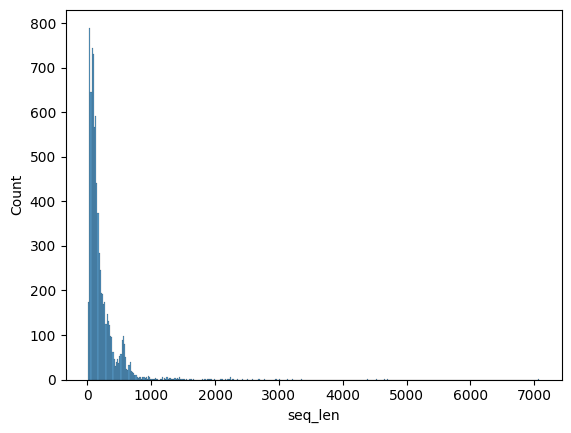

          start          end  count  percentage
0     11.000000   599.916667   7701   95.344806
1    599.916667  1188.833333    283    3.503776
2   1188.833333  1777.750000     47    0.581899
3   1777.750000  2366.666667     28    0.346663
4   2366.666667  2955.583333      8    0.099047
5   2955.583333  3544.500000      5    0.061904
6   3544.500000  4133.416667      0    0.000000
7   4133.416667  4722.333333      4    0.049523
8   4722.333333  5311.250000      0    0.000000
9   5311.250000  5900.166667      0    0.000000
10  5900.166667  6489.083333      0    0.000000
11  6489.083333  7078.000000      1    0.012381


In [39]:
print_seq_len_histogram(non_idv_less_than_one_percent_prevalence_df, 12)

In [40]:
non_idv_less_than_one_percent_prevalence_seq_len_filtered_df = non_idv_less_than_one_percent_prevalence_df[non_idv_less_than_one_percent_prevalence_df["seq_len"] <= 3025]
non_idv_less_than_one_percent_prevalence_seq_len_filtered_df.shape

(8069, 12)

In [41]:
output_file_path = os.path.join(os.getcwd(), "..", "..", "..","..", "/home/sanjanag05/HAVEN/output/uniref50_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq_non_idv_lt_1percent_prevalence_seq_len_in_99percentile.csv")
#output_file_path = os.path.join(os.getcwd(), "..", "..", "..","..", "home/sanjanag05/HAVEN/output/uniref50_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq_non_idv_t0.01_c5_seq_len_in_99.9percentile.csv")
non_idv_less_than_one_percent_prevalence_seq_len_filtered_df.to_csv(output_file_path)
#DOESNT GET WRITTEN TO CSV?

#### Non-IDV with host prevalence < 1%, >=0.05%

In [42]:
filtered_df = filter_with_threshold_percentage(non_idv_less_than_one_percent_prevalence_df, "virus_host_name", 0.05, n=47792)

Size of df = (8077, 12)
n= 47792
Number of unique values = 15
              virus_host_name  virus_host_name_count  virus_host_name_percent
0                homo sapiens                   3551                 7.430114
1                  sus scrofa                    729                 1.525360
2   hydrochoerus hydrochaeris                    605                 1.265902
3       propithecus coquereli                    421                 0.880901
4          marmota himalayana                    401                 0.839053
5             cyprinus carpio                    398                 0.832775
6           varecia variegata                    364                 0.761634
7               gallus gallus                    285                 0.596334
8              eulemur fulvus                    227                 0.474975
9           peromyscus boylii                    210                 0.439404
10          gopherus morafkai                    205                 0.428942
11

min seq len = 11
max seq len = 7078


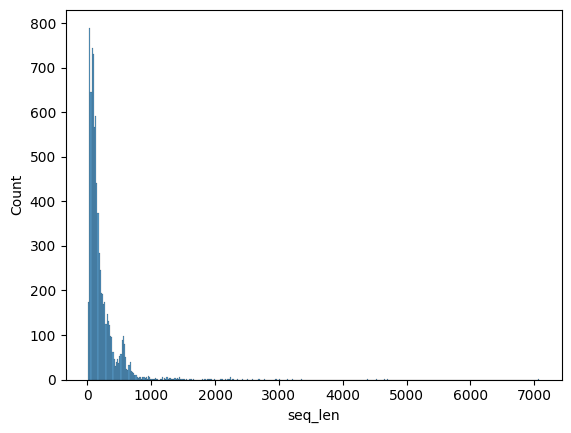

          start          end  count  percentage
0     11.000000   599.916667   7701   95.344806
1    599.916667  1188.833333    283    3.503776
2   1188.833333  1777.750000     47    0.581899
3   1777.750000  2366.666667     28    0.346663
4   2366.666667  2955.583333      8    0.099047
5   2955.583333  3544.500000      5    0.061904
6   3544.500000  4133.416667      0    0.000000
7   4133.416667  4722.333333      4    0.049523
8   4722.333333  5311.250000      0    0.000000
9   5311.250000  5900.166667      0    0.000000
10  5900.166667  6489.083333      0    0.000000
11  6489.083333  7078.000000      1    0.012381


In [43]:
filtered_df.shape
print_seq_len_histogram(filtered_df, 12)

In [44]:
output_file_path = os.path.join(os.getcwd(), "..", "..", "..","..", "/home/sanjanag05/HAVEN/output/uniref50_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq_non_idv_lt_1_gte_0.05_prcnt_prevalence.csv")
filtered_df.to_csv(output_file_path)

In [45]:
np.percentile(filtered_df["seq_len"].values, [90, 95, 99])

array([ 483.  ,  588.  , 1281.92])

In [46]:
seq_len_filtered_df = filtered_df[filtered_df["seq_len"] <= 2452]
seq_len_filtered_df.shape

(8060, 12)

In [47]:
column_stats(seq_len_filtered_df, "virus_host_name")

Number of unique values = 15
              virus_host_name  virus_host_name_count  virus_host_name_percent
0                homo sapiens                   3546                43.995037
1                  sus scrofa                    723                 8.970223
2   hydrochoerus hydrochaeris                    605                 7.506203
3       propithecus coquereli                    421                 5.223325
4          marmota himalayana                    400                 4.962779
5             cyprinus carpio                    397                 4.925558
6           varecia variegata                    364                 4.516129
7               gallus gallus                    285                 3.535980
8              eulemur fulvus                    226                 2.803970
9           peromyscus boylii                    210                 2.605459
10          gopherus morafkai                    205                 2.543424
11       theropithecus gelada      

,virus_host_name,virus_host_name_count,virus_host_name_percent
0,homo sapiens,3546,43.995037
1,sus scrofa,723,8.970223
2,hydrochoerus hydrochaeris,605,7.506203
3,propithecus coquereli,421,5.223325
4,marmota himalayana,400,4.962779
5,cyprinus carpio,397,4.925558
6,varecia variegata,364,4.516129
7,gallus gallus,285,3.535980
8,eulemur fulvus,226,2.803970
9,peromyscus boylii,210,2.605459


In [48]:
output_file_path = os.path.join(os.getcwd(), "..", "..", "..","..", "/home/sanjanag05/HAVEN/output/uniref50_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq_non_idv_lt_1_gte_0.05_prcnt_prevalence_seq_len_in_99prcntile.csv")
#seq_len_filtered_df.to_csv(output_file_path, index=False)
#not written to arc? do i leave it commented out?

#### Non Immunodeficiency Virus, hosts with >= 0.05% prevalence in the dataset

In [49]:
filtered_df = filter_with_threshold_percentage(non_idv_df, "virus_host_name", 0.05, n=47792)

Size of df = (15278, 12)
n= 47792
Number of unique values = 937
               virus_host_name  virus_host_name_count  virus_host_name_percent
0                 homo sapiens                   3551                 7.430114
1                   sus scrofa                    729                 1.525360
2    hydrochoerus hydrochaeris                    605                 1.265902
3        propithecus coquereli                    421                 0.880901
4           marmota himalayana                    401                 0.839053
..                         ...                    ...                      ...
932                 anas acuta                      1                 0.002092
933       hylomyscus endorobae                      1                 0.002092
934          diphylla ecaudata                      1                 0.002092
935           blue-winged teal                      1                 0.002092
936              paradise fish                      1              

In [50]:
column_stats(filtered_df, "virus_host_name")

Number of unique values = 87
              virus_host_name  virus_host_name_count  virus_host_name_percent
0                homo sapiens                   3551                29.981425
1                  sus scrofa                    729                 6.155015
2   hydrochoerus hydrochaeris                    605                 5.108072
3       propithecus coquereli                    421                 3.554542
4          marmota himalayana                    401                 3.385681
..                        ...                    ...                      ...
82   arctocephalus tropicalis                     25                 0.211077
83          pteropus tonganus                     25                 0.211077
84          microtus agrestis                     25                 0.211077
85       lemniscomys striatus                     24                 0.202634
86                       mink                     24                 0.202634

[87 rows x 3 columns]


,virus_host_name,virus_host_name_count,virus_host_name_percent
0,homo sapiens,3551,29.981425
1,sus scrofa,729,6.155015
2,hydrochoerus hydrochaeris,605,5.108072
3,propithecus coquereli,421,3.554542
4,marmota himalayana,401,3.385681
...,...,...,...
82,arctocephalus tropicalis,25,0.211077
83,pteropus tonganus,25,0.211077
84,microtus agrestis,25,0.211077
85,lemniscomys striatus,24,0.202634


In [51]:
output_file_path = os.path.join(os.getcwd(), "..", "..", "..","..", "/home/sanjanag05/HAVEN/output/uniref50_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq_non_idv_gte_0.05_prcnt_prevalence.csv")
filtered_df.to_csv(output_file_path, index=False)

In [52]:
filtered_df.shape

(11844, 12)

**Back to number of host classes**

In [53]:
# 0.7% cutoff
filtered_df = filter_with_threshold_percentage(non_idv_df, "virus_host_name", 0.7)

Size of df = (15278, 12)
n= 15278
Number of unique values = 937
               virus_host_name  virus_host_name_count  virus_host_name_percent
0                 homo sapiens                   3551                23.242571
1                   sus scrofa                    729                 4.771567
2    hydrochoerus hydrochaeris                    605                 3.959942
3        propithecus coquereli                    421                 2.755596
4           marmota himalayana                    401                 2.624689
..                         ...                    ...                      ...
932                 anas acuta                      1                 0.006545
933       hylomyscus endorobae                      1                 0.006545
934          diphylla ecaudata                      1                 0.006545
935           blue-winged teal                      1                 0.006545
936              paradise fish                      1              

In [54]:
output_file_path = os.path.join(os.getcwd(), "..", "..", "..","..", "/home/sanjanag05/HAVEN/output/uniref50_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq_non_idv_t0.007_c7.csv")
filtered_df.to_csv(output_file_path, index=False)

In [55]:
# 0.5% cutoff
filtered_df = filter_with_threshold_percentage(non_idv_df, "virus_host_name", 0.5)

Size of df = (15278, 12)
n= 15278
Number of unique values = 937
               virus_host_name  virus_host_name_count  virus_host_name_percent
0                 homo sapiens                   3551                23.242571
1                   sus scrofa                    729                 4.771567
2    hydrochoerus hydrochaeris                    605                 3.959942
3        propithecus coquereli                    421                 2.755596
4           marmota himalayana                    401                 2.624689
..                         ...                    ...                      ...
932                 anas acuta                      1                 0.006545
933       hylomyscus endorobae                      1                 0.006545
934          diphylla ecaudata                      1                 0.006545
935           blue-winged teal                      1                 0.006545
936              paradise fish                      1              

In [56]:
output_file_path = os.path.join(os.getcwd(), "..", "..", "..","..", "/home/sanjanag05/HAVEN/output/uniref50_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq_non_idv_t0.005_c13.csv")
filtered_df.to_csv(output_file_path, index=False)

## Immunodeficiency Virus

In [57]:
idv_df = df[df["virus_name"].isin(idv_names)]
idv_df.shape

(573, 12)

In [58]:
output_file_path = os.path.join(os.getcwd(), "..", "..", "..","..", "/home/sanjanag05/HAVEN/output/uniref50_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq_idv.csv")
idv_df.to_csv(output_file_path, index=False)
idv_df = pd.read_csv(output_file_path)